In [1]:
import pathlib
import shutil
import glob
import os
import re
import ftfy
import pandas as pd
import statsmodels.api as sm

import sklearn
import sklearn.linear_model

pd.options.display.max_rows = 1000
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv("consolidated_DF_2022_2022.csv", parse_dates=["trip_start_time", "trip_stop_time"])

In [3]:
df["trip_start_daily_minutes"] = df["trip_start_time"].apply(lambda x: x.hour*60 + x.minute)

<AxesSubplot: >

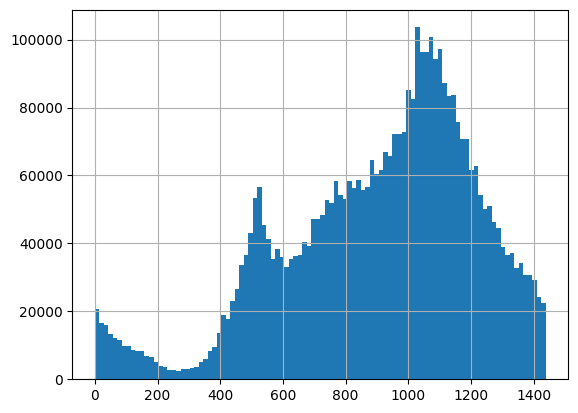

In [4]:
df["trip_start_daily_minutes"].hist(bins=100)

In [7]:
regression = sklearn.linear_model.LinearRegression()

In [12]:
reg_features=["trip_start_daily_minutes"]
target = "trip_duration_seconds"

In [13]:
x = df[reg_features]

In [14]:
y = df[target]

In [15]:
model = sm.OLS(y, x).fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     trip_duration_seconds   R-squared (uncentered):                   0.556
Model:                               OLS   Adj. R-squared (uncentered):              0.556
Method:                    Least Squares   F-statistic:                          5.126e+06
Date:                   Sat, 28 Jan 2023   Prob (F-statistic):                        0.00
Time:                           21:20:38   Log-Likelihood:                     -3.3068e+07
No. Observations:                4101018   AIC:                                  6.614e+07
Df Residuals:                    4101017   BIC:                                  6.614e+07
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
trip_start_daily_minutes     0.8968      0.000   2264.157      0.000       0.896       0.898
==============================================================================
Omnibus:                  3186144.493   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        113699677.907
Skew:                           3.451   Prob(JB):                         0.00
Kurtosis:                      27.854   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""